In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bicker.emulator as BICKER

In [2]:
path_to_repo = "/Users/jamie/Desktop/GitHubProjects/BICKER/"

In [3]:
cosmos = np.load(path_to_repo+"data/cosmologies/eft_cosmologies_noDQ1.npy")[:1000]

In [4]:
kernels = np.load(path_to_repo+"data/kernels/1000_cosmo_c2_b2_f.npy")

In [5]:
emu = BICKER.component_emulator("c2-b2-f")

2022-02-17 16:43:15.192767: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


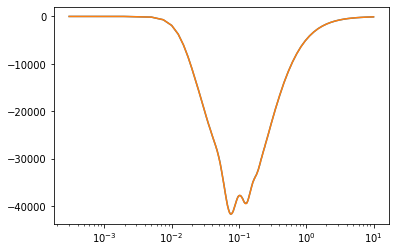

In [10]:
plt.semilogx(emu.kbins, emu.kbins*emu.emu_predict(cosmos[0])[0])
plt.semilogx(emu.kbins, emu.kbins*kernels[0])
plt.show()

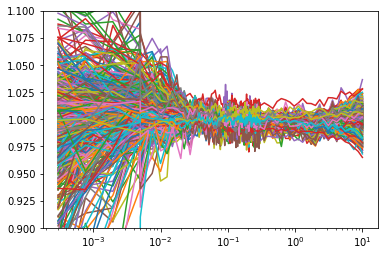

In [12]:
plt.semilogx(emu.kbins, (emu.emu_predict(cosmos[:1000])/kernels).T)
plt.ylim(0.9,1.1)
plt.show()